## There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT using machine learning.

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/heart_failure.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **EDA**

## 1. Correlation Matrix

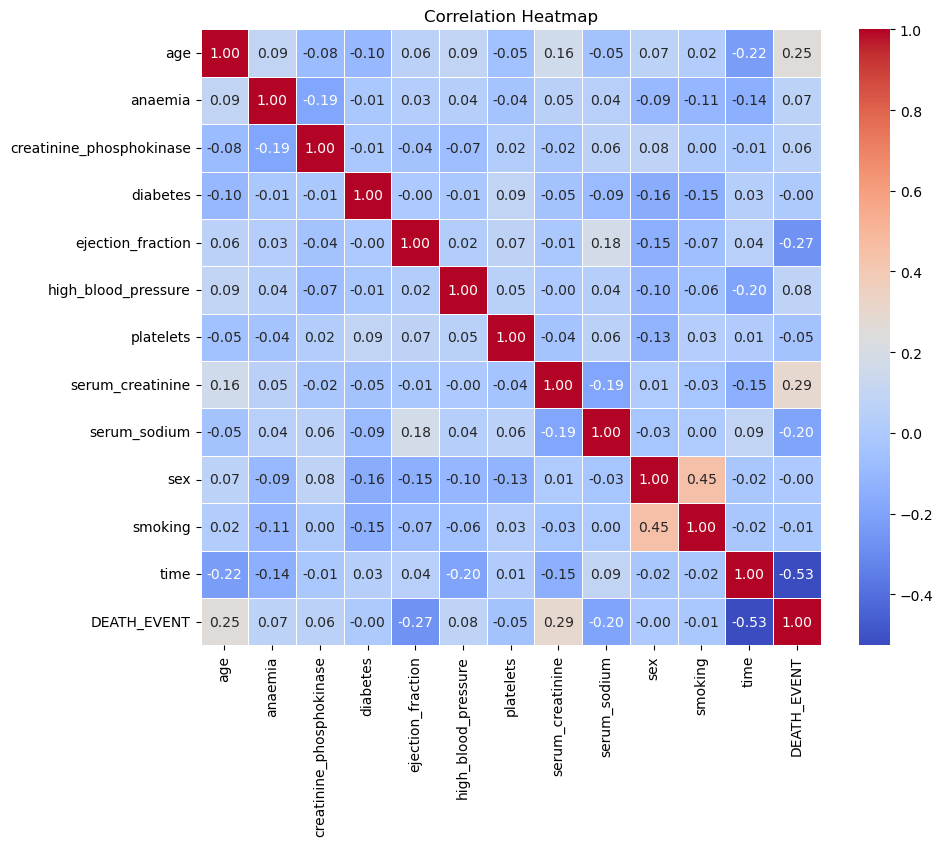

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 2. Numerical Columns Analysis

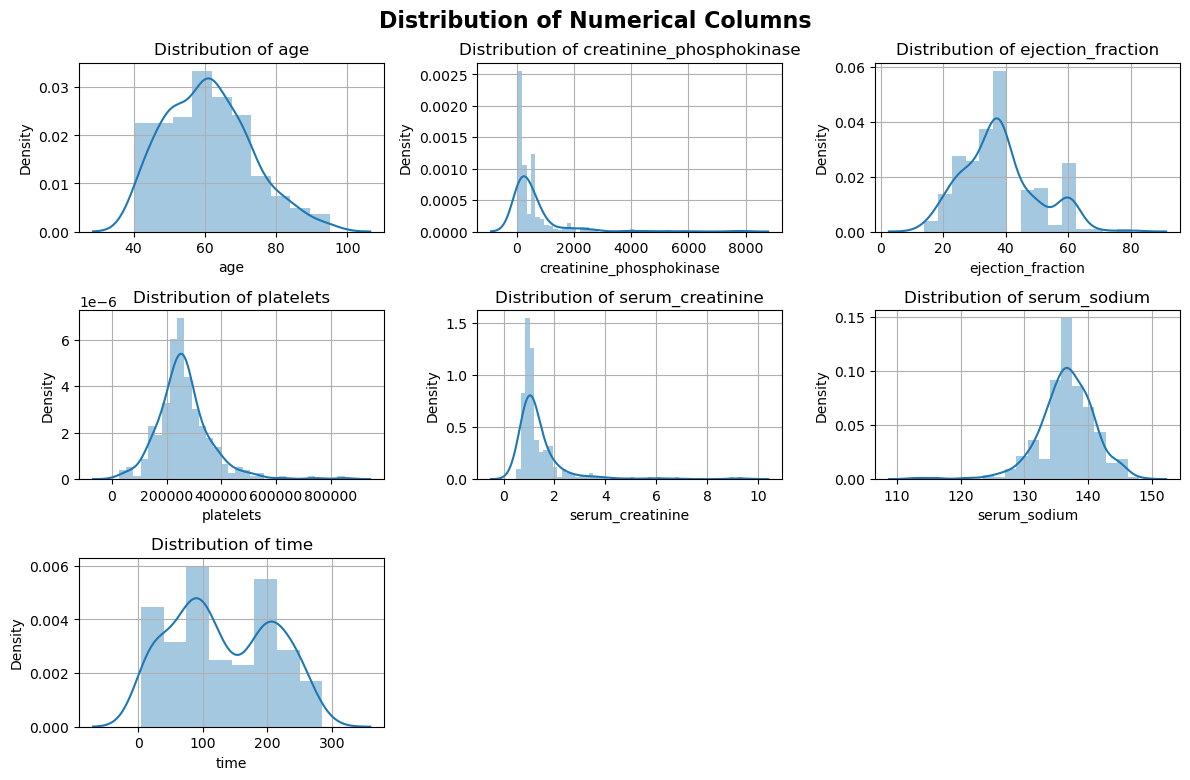

In [6]:
columns = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
numerical_col = data[columns]

plt.figure(figsize=(12,10))
plt.suptitle('Distribution of Numerical Columns', fontweight='bold', fontsize=16)
for i,col in enumerate(numerical_col.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(numerical_col[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

## 3. DEATH_EVENT Analysis

First, I want copy the dataset, because I want change some values from the columns

In [7]:
data2 = data.copy()

#### 3.1 Distribution Of DEATH_EVENT

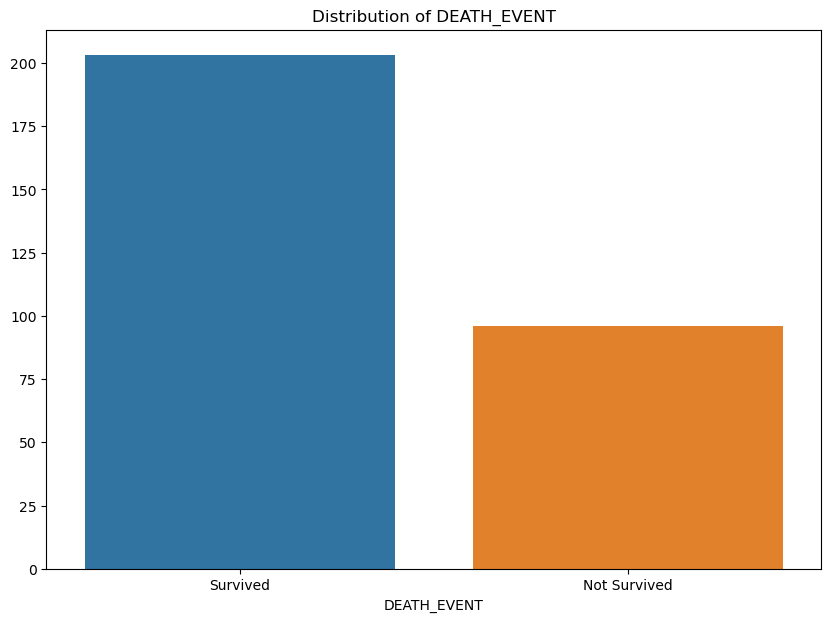

In [8]:
data2['DEATH_EVENT'] = data2['DEATH_EVENT'].replace({1:'Not Survived', 0:'Survived'})
death_count = data2['DEATH_EVENT'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(
    x=death_count.index,
    y=death_count.values,
)

plt.title('Distribution of DEATH_EVENT')
plt.show()

#### 3.2 Distribution of DEATH_EVENT Based On Age

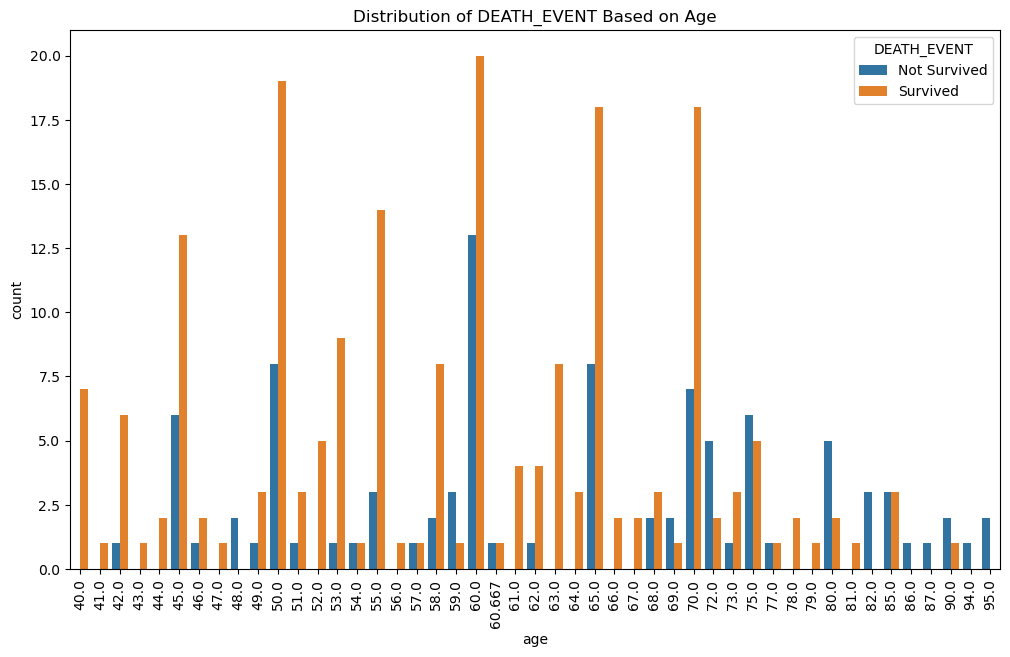

In [9]:
plt.figure(figsize=(12, 7))

sns.countplot(
    data=data2,
    x=data2['age'],
    hue=data2['DEATH_EVENT']
)

plt.title('Distribution of DEATH_EVENT Based on Age')
plt.xticks(rotation=90)
plt.show()

#### 3.3 Percentage of DEATH_EVENT

In [10]:
def pie_chart(data, colors):
    plt.pie(
        data,
        autopct='%1.1f%%', 
        startangle=90,
        explode=(0, 0.1),
        colors=colors,
        shadow=True,
)

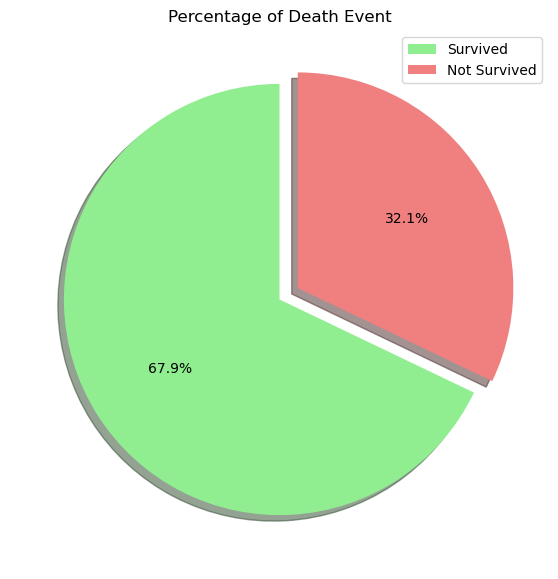

In [11]:
plt.figure(figsize=(7, 7))
pie_chart(
    death_count,
    colors=['lightgreen', 'lightcoral']
)

plt.legend(death_count.index)
plt.title('Percentage of Death Event')
plt.show()

#### 3.4 Percentage of Sufferers that Causes of Death

In [12]:
#death count anaemia
data_anaemia = data[data['anaemia'] == 1]
death_count_anaemia = data_anaemia['DEATH_EVENT'].value_counts()

#death count diabetes
data_diabetes = data[data['diabetes'] == 1]
death_count_diabetes = data_diabetes['DEATH_EVENT'].value_counts()

#death count high blood pressure
data_high_blood = data[data['high_blood_pressure'] == 1]
death_count_high_blood = data_high_blood['DEATH_EVENT'].value_counts()

#death count smooking
data_smooking = data[data['smoking'] == 1]
death_count_smooking = data_smooking['DEATH_EVENT'].value_counts()

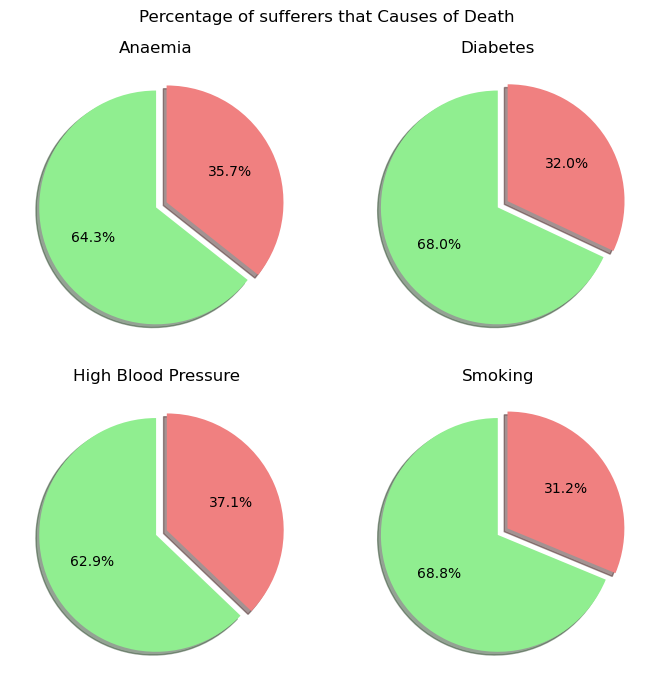

In [13]:
plt.figure(figsize=(7, 7))
#anaemia
plt.subplot(2, 2, 1)
pie_chart(
    death_count_anaemia,
    colors=['lightgreen', 'lightcoral']
)
plt.title('Anaemia')

#diabetes
plt.subplot(2, 2, 2)
pie_chart(
    death_count_diabetes,
    colors=['lightgreen', 'lightcoral']
)
plt.title('Diabetes')

#high blood pressure
plt.subplot(2, 2, 3)
pie_chart(
    death_count_high_blood,
    colors=['lightgreen', 'lightcoral']
)
plt.title('High Blood Pressure')

#smoking
plt.subplot(2, 2, 4)
pie_chart(
    death_count_smooking,
    colors=['lightgreen', 'lightcoral']
)
plt.title('Smoking')

plt.suptitle('Percentage of sufferers that Causes of Death')
plt.tight_layout()
plt.show()

## 4. Gender Analysis

#### 4.1 Distribution of Gender

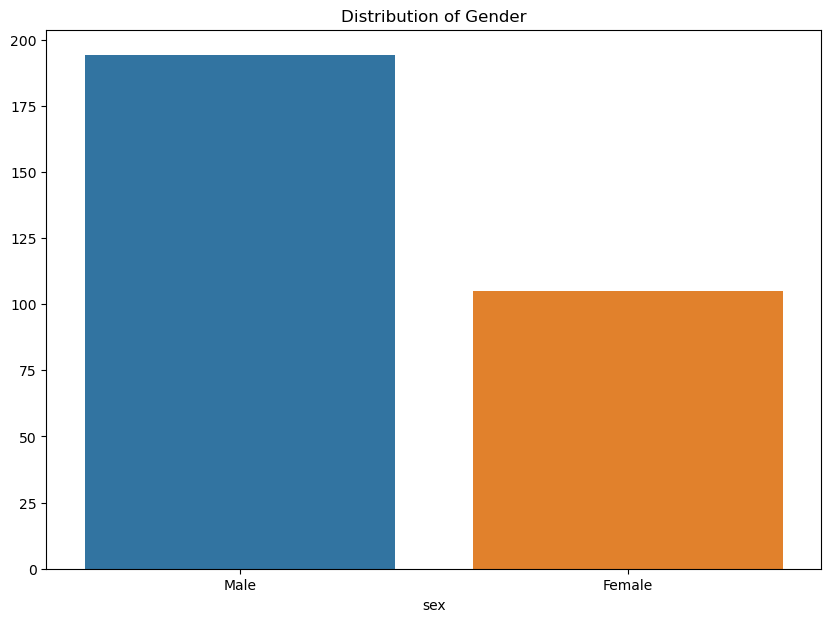

In [14]:
data2['sex'] = data2['sex'].replace({1:'Male', 0:'Female'})
gender_count = data2['sex'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(
    x=gender_count.index,
    y=gender_count.values,
)

plt.title('Distribution of Gender')
plt.show()

#### 4.2 Distribution of Gender Based on Age

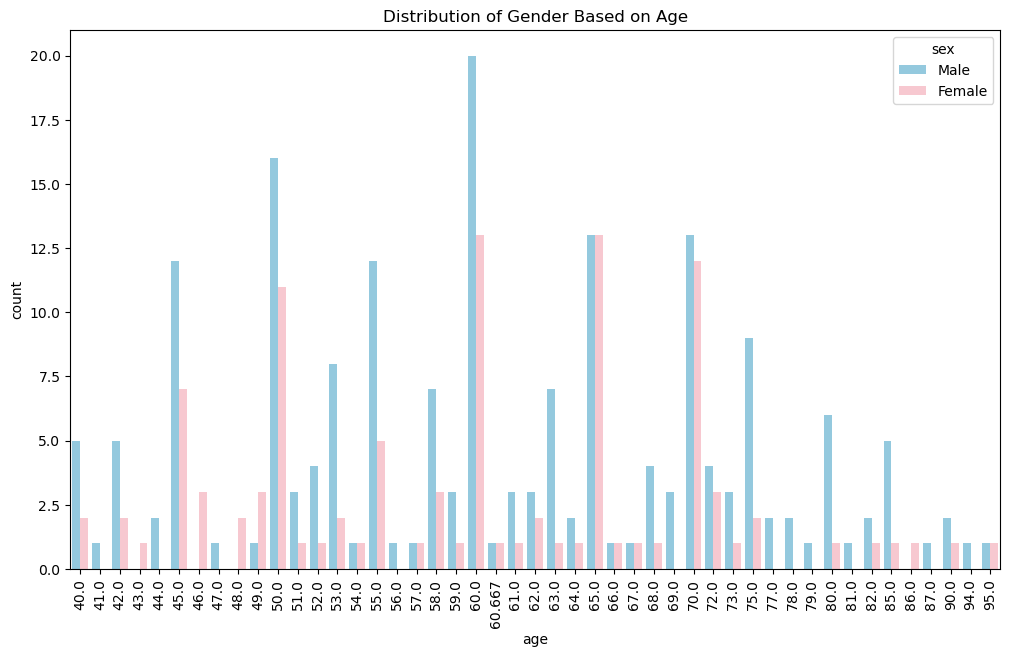

In [15]:
plt.figure(figsize=(12, 7))

sns.countplot(
    data=data2,
    x=data2['age'],
    hue=data2['sex'],
    palette=({'Male':'skyblue', 'Female':'pink'}),
)

plt.title('Distribution of Gender Based on Age')
plt.xticks(rotation=90)
plt.show()

#### 4.3 Percentage Male vs Female

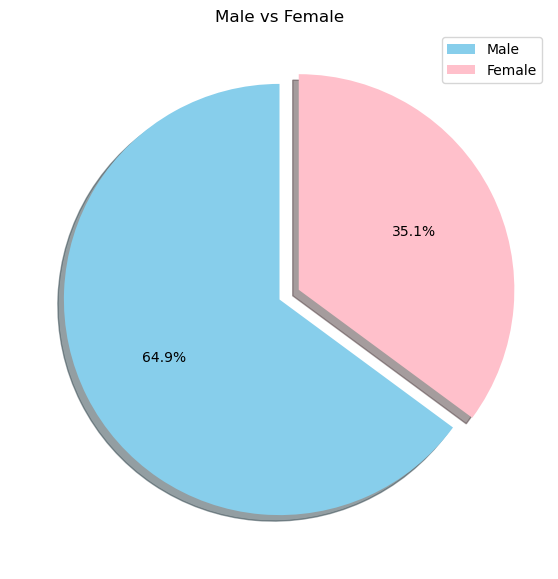

In [16]:
gender_count = data2['sex'].value_counts()

plt.figure(figsize=(7, 7))
pie_chart(
    gender_count,
    colors=['skyblue', 'pink']
)

plt.title('Male vs Female')
plt.legend(gender_count.index)
plt.show()

# **Prepocessing Data**

## 1. Feature Selection and Split Dataset

In [17]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Data Scaling

In [18]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train)
X_test_scaled = pd.DataFrame(X_test)

# **Modeling**

## 1. Logistic Regression

In [19]:
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.61      0.76        23

    accuracy                           0.85        60
   macro avg       0.90      0.80      0.82        60
weighted avg       0.88      0.85      0.84        60

Accuracy Score : 85.0%


## 2. KNN

In [21]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        37
           1       0.78      0.30      0.44        23

    accuracy                           0.70        60
   macro avg       0.73      0.63      0.62        60
weighted avg       0.72      0.70      0.66        60

Accuracy Score : 70.0%


## 3. Support Vector Machine

In [23]:
svm = SVC(kernel='linear')

svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [24]:
y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60

Accuracy Score : 83.33333333333334%


## 4. Naive Bayes

In [25]:
nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

GaussianNB()

In [26]:
y_pred = nb.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        37
           1       0.64      0.70      0.67        23

    accuracy                           0.73        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.74      0.73      0.74        60

Accuracy Score : 73.33333333333333%


## 5. Decission Tree

In [27]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_pred = dt.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.78      0.78      0.78        23

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score : 83.33333333333334%


## 6. Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [30]:
y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.80      0.70      0.74        23

    accuracy                           0.82        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60

Accuracy Score : 81.66666666666667%


## 7. Gradient Boosting

In [31]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [32]:
y_pred = gb.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.90      0.78      0.84        23

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60

Accuracy Score : 88.33333333333333%


## 8. Bagging Classifier

In [33]:
bg = BaggingClassifier(estimator=logreg, n_estimators=10, random_state=0)

bg.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=LogisticRegression(), random_state=0)

In [34]:
y_pred = bg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test, y_pred) * 100}%")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.61      0.76        23

    accuracy                           0.85        60
   macro avg       0.90      0.80      0.82        60
weighted avg       0.88      0.85      0.84        60

Accuracy Score : 85.0%


## We got our result with a several model that we tried to predict Death Event cause by heart failure.We prefer to use Gradient Boosting as an ensemble model for this dataset because it has the highest accuracy score among the other model.